In [8]:
import requests
import pandas as pd

**Carico il Dataset (Load Dataset)**

**Raccogliamo i dati della partita (we collect the shooting data for the game)**

In [9]:

url = "https://live.euroleague.net/api/Points?gamecode=139&seasoncode=E2021"
r = requests.get(url)
print(r.status_code)  
data = r.json()
shots_df = pd.DataFrame(data['Rows'])

200


Se è andata a buon fine mi deve tornare 200 (if all goes well this must return 200)

**Mostra l'anteprima del dataset (Show DataSet Preview)**

In [10]:
shots_df.head()


,NUM_ANOT,TEAM,ID_PLAYER,PLAYER,ID_ACTION,ACTION,POINTS,COORD_X,COORD_Y,ZONE,FASTBREAK,SECOND_CHANCE,POINTS_OFF_TURNOVER,MINUTE,CONSOLE,POINTS_A,POINTS_B,UTC
0,6,MAD,P007982,"WILLIAMS-GOSS, NIGEL",3FGM,Three Pointer,3,-31,759,H,0,0,0,1,09:32,0,3,20211216193052
1,7,MIL,P004331,"DELANEY, MALCOLM",3FGA,Missed Three Pointer,0,169,696,I,0,0,0,1,09:13,0,3,20211216193111
2,9,MAD,P001392,"CAUSEUR, FABIEN",2FGM,Two Pointer,2,69,81,C,1,0,0,1,09:07,0,5,20211216193118
3,12,MIL,P002812,"HINES, KYLE",2FGA,Missed Two Pointer,0,495,169,G,0,0,0,2,08:39,0,5,20211216193146
4,19,MIL,P007831,"SHIELDS, SHAVON",2FGM,Two Pointer,2,-56,225,D,0,0,1,2,08:13,2,5,20211216193257


**Disegnamo un campo da basket FIBA usando matplot (Draw a FIBA basketball court using matplot)**

Creiamo:
1. Canestro (Create the basketball hoop)
1. Tabellone (Create backboard)
1. L'esterno del box (Create the outer box of the paint)
1. L'interno del box (Create the inner box of the paint)
1. Arco tiro libero (Create free throw top arc)
1. Arco inferiore del tiro libero (Create free throw bottom arc)
1. Arco per zona sfondamento (Restricted Zone)
1. Linee angolo linea da 3 punti (Three point line, Create the side 3pt lines)
1. Arco 3 punti (3pt arc) 
1. Arco al centro del campo (Center Court)
1. Lista con tutti gli elementi del campo 
1. Linea di metà campo, linea di base e le linee laterali (Draw the half court line, baseline and side out bound lines)
1. Aggiungere gli elementi negli assi (Add the court elements onto the axis)
 

In [42]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc


def draw_court(ax=None, color='black', lw=1, linee=True):
    """
    FIBA basketball court dimensions:
    https://www.msfsports.com.au/basketball-court-dimensions/
    It seems like the Euroleauge API returns the shooting positions
    in resolution of 1cm x 1cm.
    """
    
    if ax is None:
        ax = plt.gca()

    canestro = Circle((0, 0), radius=45.72 / 2, linewidth=lw, color=color,
                  fill=False)

    tabellone = Rectangle((-90, -157.5 + 120), 180, -1, linewidth=lw,
                          color=color)

    esterno = Rectangle((-490 / 2, -157.5), 490, 580, linewidth=lw,
                          color=color, fill=False)
    
    interno = Rectangle((-360 / 2, -157.5), 360, 580, linewidth=lw,
                          color=color, fill=False)

    arc_tiro_lib = Arc((0, 580 - 157.5), 360, 360, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)

    arc_inf_tiro_lib = Arc((0, 580 - 157.5), 360, 360, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    
    arc_sfond = Arc((0, 0), 2 * 125, 2 * 125, theta1=0, theta2=180,
                     linewidth=lw, color=color)

    angolo_tre_a = Rectangle((-750 + 90, -157.5), 0, 305, linewidth=lw,
                               color=color)
    angolo_tre_b = Rectangle((750 - 90, -157.5), 0, 305, linewidth=lw,
                               color=color)
  
    arc_tre = Arc((0, 0), 2 * 675, 2 * 675, theta1=12, theta2=167.5,
                    linewidth=lw, color=color)

    arc_centrale = Arc((0, 1400-157.5), 2 * 180, 2 * 180, theta1=180,
                           theta2=0, linewidth=lw, color=color)

    elementi_campo = [canestro, tabellone, esterno, interno,
                      arc_sfond, arc_tiro_lib, arc_inf_tiro_lib,
                      angolo_tre_a, angolo_tre_b, arc_tre,
                      arc_centrale]
    if linee:
        
        linee = Rectangle((-750, -157.5), 1500, 1400, linewidth=lw,
                                color=color, fill=False)
        elementi_campo.append(linee)

    for element in elementi_campo:
        ax.add_patch(element)

    return ax

**Creazione ShotChart (The shot charts)**

1. Scatter plot dei tiri messi e sbagliati (Scatter plot of made and missed shots)
1. Grafico delle densità dei tiri (Density plot of shots)

In [50]:

import matplotlib.pyplot as plt
import seaborn as sns


def plot_scatter(made, miss, title=None):
    plt.figure(figsize=(5, 4.7))
    draw_court()
    plt.plot(made['COORD_X'], made['COORD_Y'], 'o', label='Made')
    plt.plot(miss['COORD_X'], miss['COORD_Y'], 'x', markerfacecolor='none',
             label='Missed')
    plt.legend()
    plt.xlim([-800, 800])
    plt.ylim([-200, 1300])
    plt.title(title)
    plt.show()
    return


def joint_plot(df, kind='hex', title=None):
    cmap = plt.cm.gist_heat_r
    joint_shot_chart = sns.jointplot(x=df['COORD_X'], y=df['COORD_Y'],
                                     kind='hex', space=0, color=cmap(.2),
                                     cmap=cmap, joint_kws={"gridsize": 15})

    ax = joint_shot_chart.ax_joint
    draw_court(ax)
    plt.xlim([-800, 800])
    plt.ylim([-200, 1300])
    plt.title(title)
    plt.show()
    return

Divisione dei tiri delle 2 squadre (split the home and away teams, their made and missed shots)

In [51]:
shots_df['TEAM'] = shots_df['TEAM'].str.strip() 
shots_df['ID_PLAYER'] = shots_df['ID_PLAYER'].str.strip()  

home_df = shots_df[shots_df['TEAM'] == 'MIL']
fg_made_home_df = home_df[home_df['ID_ACTION'].isin(['2FGM', '3FGM'])]
fg_miss_home_df = home_df[home_df['ID_ACTION'].isin(['2FGA', '3FGA'])]

away_df = shots_df[shots_df['TEAM'] == 'MAD']
fg_made_away_df = away_df[away_df['ID_ACTION'].isin(['2FGM', '3FGM'])]
fg_miss_away_df = away_df[away_df['ID_ACTION'].isin(['2FGA', '3FGA'])]




**Scatter tiri Olimpia Milano (scatter shot chart of MILs)**

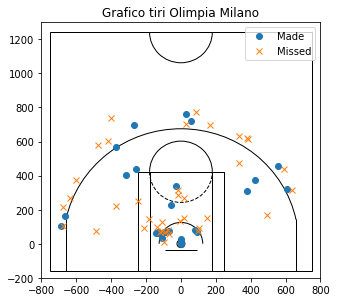

In [25]:

plot_scatter(fg_made_home_df, fg_miss_home_df, title='Grafico tiri Olimpia Milano')



**Grafico tiri Real MAdrid (scatter shot chart of MAD)**

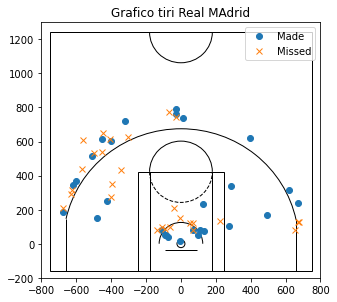

In [26]:
# scatter shot chart of MAD
plot_scatter(fg_made_away_df, fg_miss_away_df, title='Grafico tiri Real MAdrid')

# Grafico densità tiri Olimpia Milano(density plot of all MIL's shots (made and missed))

TypeError: 'str' object is not callable

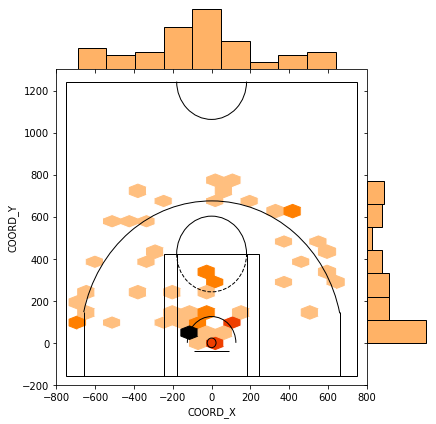

In [52]:
fg_home_shots = pd.concat((fg_made_home_df, fg_miss_home_df))
joint_plot(fg_home_shots, title='MILs Attemped Shots (made and missed)')

# fg_away_shots = pd.concat((fg_made_away_df, fg_miss_away_df), axis=0)
# joint_plot(fg_away_shots, title='MADs Attemped Shots (made and missed)')

TypeError: 'str' object is not callable

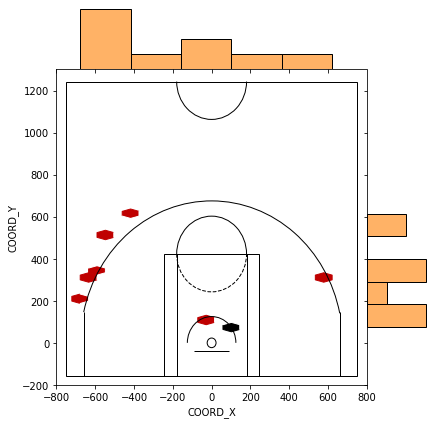

In [36]:
shots_df['TEAM'] = shots_df['TEAM'].str.strip()  # team id contains trailing white space
shots_df['ID_PLAYER'] = shots_df['ID_PLAYER'].str.strip()  # player id contains trailing white space

# split the home and away teams, their made and missed shots
Datome = shots_df[shots_df['PLAYER'] == 'CAUSEUR, FABIEN']
Datome_made = Datome[Datome['ID_ACTION'].isin(['2FGM', '3FGM'])]
len(Datome_made)
Datome_miss = Datome[Datome['ID_ACTION'].isin(['2FGA', '3FGA'])]
len(Datome_miss)
Datome_shots = pd.concat((Datome_made, Datome_miss), axis=0)
joint_plot(Datome_shots)